# Import Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import mglearn

# Linear Regression on Wave Dataset

X shape: (60, 1)
y shape: (60,)


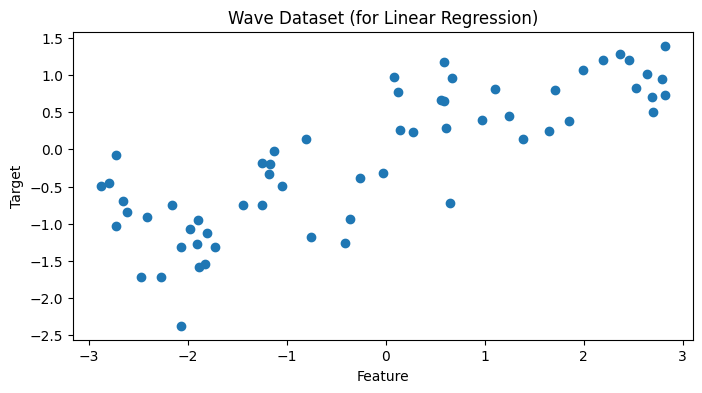

Linear Regression
Training score: 0.67
Test score: 0.66
Coefficient: [0.39390555]
Intercept: -0.031804343026759746


In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60) # X = input feature, y = target variable
print("X shape:", X.shape)
print("y shape:", y.shape)

plt.figure(figsize=(8, 4))
plt.plot(X, y, 'o')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Wave Dataset (for Linear Regression)")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("Linear Regression")
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))
print("Coefficient:", lr.coef_)
print("Intercept:", lr.intercept_)

# Plotting regression line

Line shape: (1000, 1)


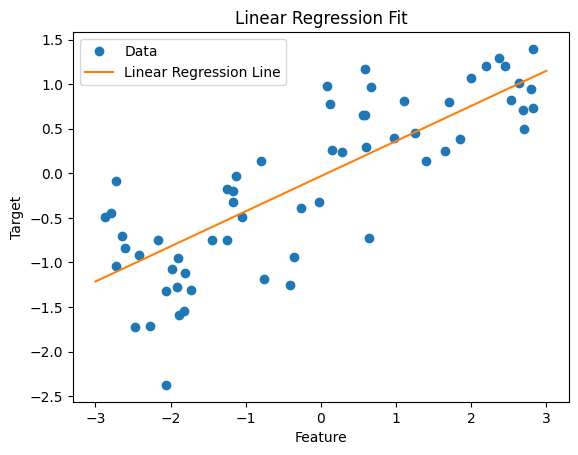

In [4]:
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print("Line shape:", line.shape)

plt.plot(X, y, 'o', label="Data")
plt.plot(line, lr.predict(line), '-', label="Linear Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Ridge and Lasso Regression on Extended Boston Housing

In [5]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Ridge Regression

In [6]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Ridge Regression")
print("Alpha=1: Train score: {:.2f}, Test score: {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))
print("Alpha=10: Train score: {:.2f}, Test score: {:.2f}".format(ridge10.score(X_train, y_train), ridge10.score(X_test, y_test)))
print("Alpha=0.1: Train score: {:.2f}, Test score: {:.2f}".format(ridge01.score(X_train, y_train), ridge01.score(X_test, y_test)))

Ridge Regression
Alpha=1: Train score: 0.87, Test score: 0.81
Alpha=10: Train score: 0.77, Test score: 0.73
Alpha=0.1: Train score: 0.92, Test score: 0.82


# Lasso Regression

In [7]:
lasso = Lasso(alpha=1.0, max_iter=10000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Lasso Regression")
print("Alpha=1: Train score: {:.2f}, Test score: {:.2f}, Features used: {}".format(
    lasso.score(X_train, y_train), lasso.score(X_test, y_test), np.sum(lasso.coef_ != 0)))
print("Alpha=0.01: Train score: {:.2f}, Test score: {:.2f}, Features used: {}".format(
    lasso001.score(X_train, y_train), lasso001.score(X_test, y_test), np.sum(lasso001.coef_ != 0)))
print("Alpha=0.0001: Train score: {:.2f}, Test score: {:.2f}, Features used: {}".format(
    lasso0001.score(X_train, y_train), lasso0001.score(X_test, y_test), np.sum(lasso0001.coef_ != 0)))

Lasso Regression
Alpha=1: Train score: 0.27, Test score: 0.26, Features used: 3
Alpha=0.01: Train score: 0.89, Test score: 0.80, Features used: 34
Alpha=0.0001: Train score: 0.94, Test score: 0.81, Features used: 95


# Plotting Ridge and Lasso Coefficients

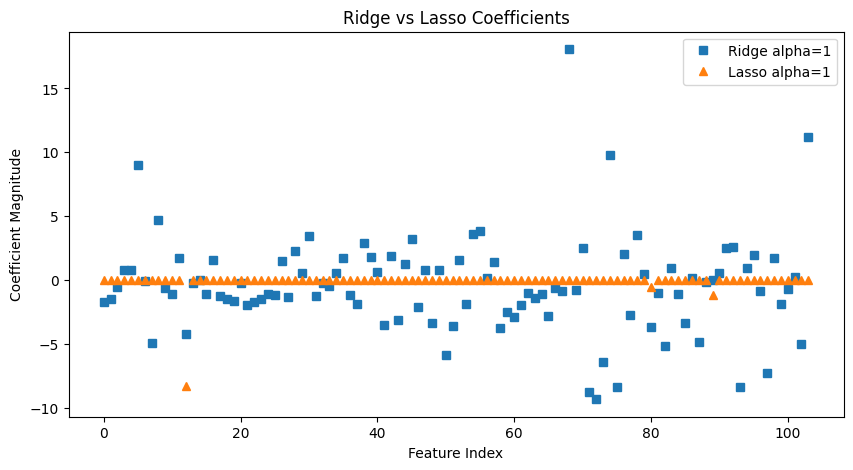

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()

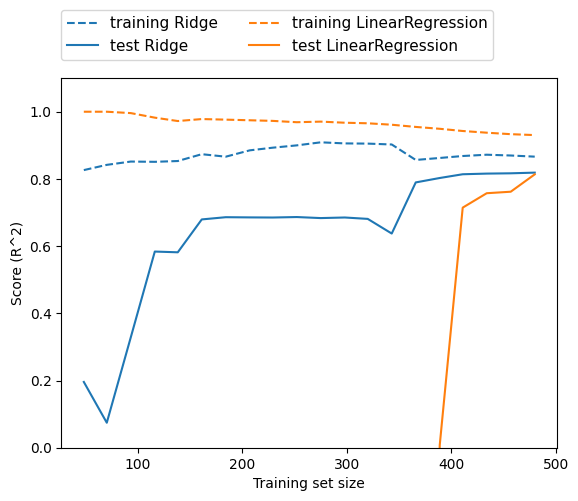

In [9]:
mglearn.plots.plot_ridge_n_samples()